## Model Training

Transformers will be used to train the Machine Learning Model. It is possible due to complexity that this notebook will be trained in Google Colab and later download to this repo.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.0 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
     |████████████████████████████████| 596 kB 54.9 MB/s 
     |████████████████████████████████| 6.6 MB 15.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 14.7 MB/s 
     |████████████████████████████████| 212 kB 62.0 MB/s 
     |████████████████████████████████| 141 kB 72.7 MB/s 
     |████████████████████████████████| 127 kB 75.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.7 MB/s 


In [6]:
import pandas as pd
import numpy as np
import os
from datasets import load_dataset, Features, ClassLabel, Value
dir_root = os.getcwd()
dir_root

'/content'

We will be using Hugging Face load rutines in order to load data and processed it. There is somehow some things that I feel like a bit lost, because in some of the examples that I have checked on huggnif faces they are not using one hot encoding. In the end we have to build a multiclass clasification and the doubt I have is if I should use the one hot variables or should only use the hagging face. If this does not work I will have to test how the Youtube video stored the tensors in numpy format, hoping that all tokenization will be able to be run

In [7]:
dataset_df = pd.read_csv('/content/drive/MyDrive/data/interim/trainset.csv', converters={'NDD':str})
# dataset_df = pd.read_csv(os.path.join(dir_root, 'data/interim/trainset.csv'), converters={'NDD':str})
dataset_df.sample(5)

,index,ndd,relato,cantidadPalabras,tipoDelitoPj,target,labelsRoboADomicilio,labelsRoboAPersonas,labelsRoboAUnidadesEconomicas,"labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos",labelsRoboDeCarros,labelsRoboDeMotos,labels
235150,408793,210101818110075,es el caso señor fiscal que el dia viernes 04 ...,112,ROBO,5,1,0,0,0,0,0,ROBO A DOMICILIO
32174,232784,120101818020157,es el caso señor fiscal que el dia de hoy lune...,220,ROBO,6,0,1,0,0,0,0,ROBO A PERSONAS
121976,336141,170101817100099,es el caso señor fiscal que el día 02 de octub...,150,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."
112091,175290,90101821052823,es el caso señor fiscal el día de hoy 19 de ma...,51,ROBO,2,0,0,0,0,1,0,ROBO DE CARROS
15130,154180,90101819082461,es el caso señor fiscal que el día 10 de agost...,95,ROBO,4,0,0,0,1,0,0,"ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEH..."


In [8]:
labels_set = set(dataset_df.labels.to_list())

In [9]:
labels_set

{'ROBO A DOMICILIO',
 'ROBO A PERSONAS',
 'ROBO A UNIDADES ECONOMICAS',
 'ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS',
 'ROBO DE CARROS',
 'ROBO DE MOTOS'}

In [10]:
traincsv = os.path.join(dir_root, '/content/drive/MyDrive/data/interim/trainsethugf.csv')
# traincsv = os.path.join(dir_root, 'data/interim/trainsethugf.csv')
testcsv = os.path.join(dir_root, '/content/drive/MyDrive/data/interim/testsethugf.csv')
# testcsv = os.path.join(dir_root, 'data/interim/testsethugf.csv')
validcsv = os.path.join(dir_root, '/content/drive/MyDrive/data/interim/validsethugf.csv')
# validcsv = os.path.join(dir_root, 'data/interim/validsethugf.csv')
# class_names = ["RoboADomicilio", "RoboAPersonas", "RoboAUnidadesEconomicas", "RoboDeBienesAccesoriosYAutoPartes", "RoboDeCarros", "RoboDeMotos"]
class_names = list(labels_set)
robo_features = Features({'relato': Value('string'), 'labels': ClassLabel(names=class_names)})
dataset = load_dataset("csv", data_files={'train': traincsv, 'test': testcsv, 'validation':validcsv}, features=robo_features)

Using custom data configuration default-4766f59570e3d30c


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-4766f59570e3d30c/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
ClassLabel(names=class_names)

ClassLabel(num_classes=6, names=['ROBO DE CARROS', 'ROBO A UNIDADES ECONOMICAS', 'ROBO A DOMICILIO', 'ROBO A PERSONAS', 'ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS', 'ROBO DE MOTOS'], id=None)

In [12]:
class_names_dict1 = dict(zip(range(6), class_names ))
class_names_dict1.items()

dict_items([(0, 'ROBO DE CARROS'), (1, 'ROBO A UNIDADES ECONOMICAS'), (2, 'ROBO A DOMICILIO'), (3, 'ROBO A PERSONAS'), (4, 'ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS'), (5, 'ROBO DE MOTOS')])

In [13]:
dataset['train'][0]

{'labels': 0,
 'relato': 'es el caso señor fiscal que el día 22 de octubre del 2014 a las 20h40 aproximadamente en circunstancias en que deje estacionado mi camioneta de placas gmd0996 color blanco marca chevrolet de mi propiedad en la dirección antes mencionada al momento de ir por ella me encuentro con la novedad que no estaba se la habían robado en el interior de la camioneta ahí una arma de fuego revolver calibre 38 de fabricación nacional que pertenece a compañía armiled por lo expuesto señor fiscal solicito que se realicen las respectivas investigaciones es justicia'}

In [14]:
seqlen = dataset_df.relato.apply(lambda x: len(x.split()))

Let us create an Histogram of the word count in Crime report

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


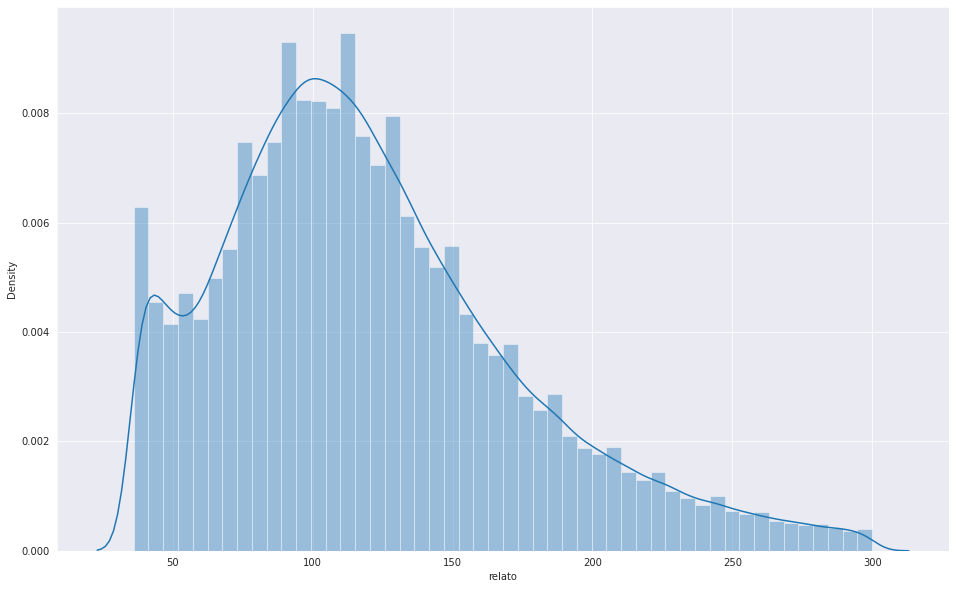

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In a example solved in https://www.youtube.com/watch?v=GYDFBfx8Ts8&t=498s, the length of the sequence was set to the maximum span of the distplot. This would imply to use a length sequence of 300. I think padding and trucate are used in consequence with this size so that all tensors in would have the same length. I think that if we chouse $SEQ\_LEN<200$, those reports with values below 200 will be truncated (This is something that I need to understand when writing the paper). Now by choosing to use the maximum length, which appears to be somehow 300, there should be no truncation but padding to some of the records. Let us consider what is the maximum length of the Crime report

In [16]:
seqlen.max()

300

In [17]:
dataset_df.cantidadPalabras.max()

300

We have already separated the original dataset in Train and Test. Because of that, we would split this train dataset in train and validation. Test set will be used at the end in order to proof the concept

In [18]:
dataset_df.columns

Index(['index', 'ndd', 'relato', 'cantidadPalabras', 'tipoDelitoPj', 'target',
       'labelsRoboADomicilio', 'labelsRoboAPersonas',
       'labelsRoboAUnidadesEconomicas',
       'labelsRoboDeBienes,AccesoriosYAutopartesDeVehiculos',
       'labelsRoboDeCarros', 'labelsRoboDeMotos', 'labels'],
      dtype='object')

In [19]:
# X_set = dataset_df.RELATO.to_list()
# Y_set = dataset_df[['LABELS_ROBO A DOMICILIO', 
# 'LABELS_ROBO A PERSONAS',
# 'LABELS_ROBO A UNIDADES ECONOMICAS',
# 'LABELS_ROBO DE BIENES, ACCESORIOS Y AUTOPARTES DE VEHICULOS',
# 'LABELS_ROBO DE CARROS',
# 'LABELS_ROBO DE MOTOS']].to_numpy()

In [20]:
# X_set.iloc[0,:], Y_set.iloc[0,:]

In [21]:
# dataset_df.head()

In [22]:
# Y_set[:5,:]

In [23]:
# X_set[:5]

In [24]:
# len(X_set), Y_set.shape

Since the classification is of type Multicategorical, it is clear that:

$\mathbf{y} \in\mathcal{R}^6   $ corresponds to the labels of our set. The structure of $ \mathbf{X} $ will depend on the tokenization process. 

Moreover there are possible two ways to test.

1. The provided guide at https://huggingface.co/transformers/v3.2.0/custom_datasets.html, does not use attention masks. We could test first this approach.
2. We could follow the lead of https://www.youtube.com/watch?v=GYDFBfx8Ts8&t=498s, and provide both input_ids and masks_ids
3. We should compare how things go provided the classical approach by using count of words (wordvec, bag of words and others) And compare results.
4. There is something that is not being considered in this approach and it is unbalanced data. We should think about a way of balancing data

There is an interesting approach that may work and that I found at: https://github.com/tavetisyan95/huggingface-fine-tuning/blob/main/huggingface-fine-tuning.ipynb

**Problems** A problem I have encountered is that saving the model is not working. Also, I must find a way to add additional layers to the model and compile it maybe making a mixture of the things found may work

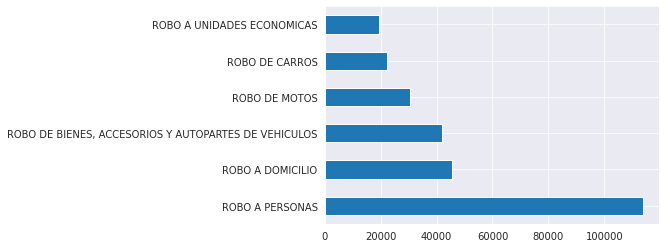

In [25]:
dataset_df.labels.value_counts().plot.barh()

I think and interesting way of solving could by making an ensemble by distributing different samples in each **weak** learner. Eventhough it is not a weak learner because they are actually transformer-convnet based learners. 

Also, it must be noticed that we are going through fine tuning a pre-trained bert model. What would happen if we train it from scratch? would it be better?

## Tokenization

Le us copy the following fuction to find the longest sequences in dataset

In [26]:
def find_max_length(dataset):
    return len(max(dataset, key=lambda x: len(x.split())).split())

In [27]:
# Obtaining the length of the longest sequences in our data splits
train_max_length = find_max_length(dataset["train"]["relato"])
val_max_length = find_max_length(dataset["validation"]["relato"])
test_max_length = find_max_length(dataset["test"]["relato"])

# Inspecting the length of the longest sequences
print(f"Longest sequence in train set has {train_max_length} words")
print(f"Longest sequence in val set has {val_max_length} words")
print(f"Longest sequence in test set has {test_max_length} words")

Longest sequence in train set has 300 words
Longest sequence in val set has 300 words
Longest sequence in test set has 300 words


Filtering sequences that are larger thatn maximun length

In [28]:
# A function for discarding sequences beyond a specified length
def filter_dataset(dataset, num_words):    
    return dataset.filter(lambda x: len(x["relato"].split()) <= num_words)

In [29]:
# Specifying the max length for sequences
num_words = 300

# Dropping sequences longer than the specified number from the dataset
filtered_dataset = filter_dataset(dataset, num_words)

  0%|          | 0/274 [00:00<?, ?ba/s]

  0%|          | 0/90 [00:00<?, ?ba/s]

  0%|          | 0/69 [00:00<?, ?ba/s]

In [30]:
print(filtered_dataset)

DatasetDict({
    train: Dataset({
        features: ['relato', 'labels'],
        num_rows: 273336
    })
    test: Dataset({
        features: ['relato', 'labels'],
        num_rows: 90000
    })
    validation: Dataset({
        features: ['relato', 'labels'],
        num_rows: 68333
    })
})


In [31]:
from transformers import DistilBertTokenizer, AutoTokenizer, DistilBertTokenizerFast
# model_name = 'xlm-roberta-large'
# model_name = 'bert-base-cased'
# model_name = 'bert-base-multilingual-uncased-sentiment'
model_name = 'distilbert-base-multilingual-cased'
# tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name) # used in the github

Testing tokenizer with any kind of content

In [32]:
tokenizer('el CASTELLANO es una LENGUA muerta')

{'input_ids': [101, 10125, 92923, 29833, 82834, 41275, 11403, 10196, 10153, 84977, 34065, 12022, 10738, 12361, 43861, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [33]:
def tokenizer_func(examples):
  return tokenizer(examples["relato"],
                   max_length=seqlen.max(),
                   padding = "max_length",
                   truncation=True)

tokenized_dataset = dataset.map(tokenizer_func, batched=True)

  0%|          | 0/274 [00:00<?, ?ba/s]

  0%|          | 0/90 [00:00<?, ?ba/s]

  0%|          | 0/69 [00:00<?, ?ba/s]

In [34]:
len(tokenized_dataset['validation'][-1]['input_ids']), tokenized_dataset['validation'][-1]['labels']

(300, 3)

In [35]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['relato', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 273336
    })
    test: Dataset({
        features: ['relato', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 90000
    })
    validation: Dataset({
        features: ['relato', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 68333
    })
})

In [36]:
# tokenized_dataset['train'][0]

In [37]:
import tensorflow as tf
tf.__version__

'2.8.2'

Following what is proposed in: https://huggingface.co/docs/transformers/tasks/sequence_classification

In [38]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [39]:
tokenized_dataset.keys()

dict_keys(['train', 'test', 'validation'])

The following procedure is the one that is presented in hugging faces tutorial

In [40]:
# tf_train_set = tokenized_dataset["train"].to_tf_dataset(
#     columns=["attention_mask", "input_ids", "labels"],
#     shuffle=True,
#     batch_size=16,
#     collate_fn=data_collator,
# )

# tf_validation_set = tokenized_dataset["validation"].to_tf_dataset(
#     columns=["attention_mask", "input_ids", "labels"],
#     shuffle=False,
#     batch_size=16,
#     collate_fn=data_collator,
# )

In [41]:
# lowering samples to proof concept again
# disable for this test where we try to use the recommendations from the github
# tf_train_set = tokenized_dataset["train"].shuffle(seed=42).select(range(20000)).to_tf_dataset(
#     columns=["attention_mask", "input_ids", "labels"],
#     shuffle=True,
#     batch_size=32,
#     collate_fn=data_collator,
# )

# tf_validation_set = tokenized_dataset["validation"].shuffle(seed=42).select(range(4000)).to_tf_dataset(
#     columns=["attention_mask", "input_ids", "labels"],
#     shuffle=False,
#     batch_size=32,
#     collate_fn=data_collator,
# )

## Preparing Features and Labels

In https://github.com/tavetisyan95/huggingface-fine-tuning/blob/main/huggingface-fine-tuning.ipynb there is another procedure to get the tensorflow vectors. I have added the shuffle method to lower the number of samples to train

In [42]:
tokenized_dataset['train']

Dataset({
    features: ['relato', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 273336
})

In [43]:
tokenized_dataset['train'][0:3]['relato'], tokenized_dataset['train'][0:3]['labels']

(['es el caso señor fiscal que el día 22 de octubre del 2014 a las 20h40 aproximadamente en circunstancias en que deje estacionado mi camioneta de placas gmd0996 color blanco marca chevrolet de mi propiedad en la dirección antes mencionada al momento de ir por ella me encuentro con la novedad que no estaba se la habían robado en el interior de la camioneta ahí una arma de fuego revolver calibre 38 de fabricación nacional que pertenece a compañía armiled por lo expuesto señor fiscal solicito que se realicen las respectivas investigaciones es justicia',
  'es el caso que el dia 18 de septiembre de 2014 aproximadamente a las 10h45 me encontraba comiendo en una picanteria en las calles 13 ava y argentina cuando de repente se me acerco un sujeto con revolver me lo apunto en el cuerpo y me dijo entregame las cosas a lo que procedi a darle lo que tenia y se fueron en una moto las cosas que me robaron fue mi billetera con cedula de identidad certificado de votacion mi licencia de conducir de l

In [44]:
tokenized_dataset['train'][0]['input_ids'][:10], tokenized_dataset['train'][1]['input_ids'][:10], tokenized_dataset['train'][2]['input_ids'][:10]

([101, 10196, 10125, 13101, 47599, 43645, 10121, 10125, 14184, 10306],
 [101, 10196, 10125, 13101, 10121, 10125, 10671, 10218, 10104, 15730],
 [101, 10196, 10125, 13101, 47599, 43645, 10121, 10125, 14184, 10104])

There is a little problem in the code that is corrected in https://github.com/tensorflow/tensorflow/issues/52382

In [45]:
train_samples = tokenized_dataset["train"].shuffle(seed=42).select(range(20000)) #.shuffle(seed=42)
valid_samples = tokenized_dataset["validation"].shuffle(seed=42).select(range(4000)) #.shuffle(seed=42)
test_samples = tokenized_dataset["test"].shuffle(seed=42).select(range(4000)) #.shuffle(seed=42)

In [46]:
train_samples[0:3]['relato'], train_samples[0:3]['labels']

(['es el caso señor fiscal el 07 de marzo del 2020 siendo aproximadamente las 12h40 en circunstancia que me encontraba laborando como soy inspector de crédito y recaudador de la empresa unicoservi iba a realizar un inspección en la ciudadela colinas de la alborada mz 712 v 3 cuando me iba a bajar me apunta en la nuca bájate de la motocicleta de placa aa466x con motor 164fmlj0gn5213 chasis lwppcmun3j0gn5213 modelo gn 200 de color azul año 2018 me bajan rápido y se van con rumbo desconocido robándome la motocicleta en la cual se encontraba un bolso de negro que contenía recibos de cobros notificaciones de cobros juego de llaves de casa encauchado carpeta con el croquis de la ciudad de guayaquil es todo lo que puedo decir en honor a la verdad',
  'mediante parte policial con numero de oficio n0 2019 1237 pj pas dnpjel de fecha 11 de septiembre se procede a ingresar por robo tipificado con el articulo 189 del codigo organico integral penal se anexa parte policial',
  'es el caso señor fisc

In [47]:
train_samples[0:3]['labels']

[5, 2, 3]

In [48]:
train_samples[0]['input_ids'][:10], train_samples[1]['input_ids'][:10], train_samples[2]['input_ids'][:10]

([101, 10196, 10125, 13101, 47599, 43645, 10125, 10878, 10104, 12401],
 [101, 18229, 10552, 86335, 10173, 15769, 10104, 10108, 38036, 182],
 [101, 10196, 10125, 13101, 47599, 43645, 10121, 10125, 14184, 10150])

In [49]:
# Removing "text" and "label" columns from our data splits to craft features for the model
train_features = train_samples.remove_columns(["relato", "labels"]).with_format("tensorflow") # use tokenized_dataset to use full dataset
val_features = valid_samples.remove_columns(["relato", "labels"]).with_format("tensorflow") # use tokenized_dataset to use full dataset
test_features = test_samples.remove_columns(["relato", "labels"]).with_format("tensorflow") # use tokenized_dataset to use full dataset

# Converting our features to TF Tensors
train_features = {x: train_features[x] for x in tokenizer.model_input_names}
val_features = {x: val_features[x] for x in tokenizer.model_input_names}
test_features = {x: test_features[x] for x in tokenizer.model_input_names}


In [50]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [51]:
train_features

{'attention_mask': <tf.Tensor: shape=(20000, 300), dtype=int64, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])>,
 'input_ids': <tf.Tensor: shape=(20000, 300), dtype=int64, numpy=
 array([[  101, 10196, 10125, ...,     0,     0,     0],
        [  101, 18229, 10552, ...,     0,     0,     0],
        [  101, 10196, 10125, ...,     0,     0,     0],
        ...,
        [  101, 10121, 10125, ...,     0,     0,     0],
        [  101, 47599, 43645, ...,     0,     0,     0],
        [  101, 10196, 10125, ...,     0,     0,     0]])>}

### generating labels
following the lead of https://github.com/tavetisyan95/huggingface-fine-tuning/blob/main/huggingface-fine-tuning.ipynb

In [52]:
# Importing the function for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Creating labels for each of the data splits
train_labels = to_categorical(train_samples["labels"])  # cambiar por tokenized_dataset
val_labels = to_categorical(valid_samples["labels"]) # cambiar por tokenized_dataset
test_labels = to_categorical(test_samples["labels"]) # cambiar por tokenized_dataset

In [53]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
# Importing the TF Dataset class
from tensorflow.data import Dataset

# Creating TF Datasets for each of our data splits
train_dataset_tf1 = Dataset.from_tensor_slices((train_features, train_labels))
val_dataset_tf1 = Dataset.from_tensor_slices((val_features, val_labels))
test_dataset_tf1 = Dataset.from_tensor_slices((test_features, test_labels))

# Shuffling and batching our data
train_dataset_tf1 = train_dataset_tf1.shuffle(len(train_features), seed=42).batch(16)
val_dataset_tf1 = val_dataset_tf1.shuffle(len(train_features), seed=42).batch(16)
test_dataset_tf1 = test_dataset_tf1.shuffle(len(train_features), seed=42).batch(16)

## Model

In [55]:
# tf_train_set[0]

In [56]:
from transformers import create_optimizer
batch_size = 16
num_epochs = 20
batches_per_epoch = len(tokenized_dataset["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
# optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [57]:
# total_train_steps

TFDistilBert has a weight of 869 MGBytes

In [58]:
from transformers import TFAutoModelForSequenceClassification, TFDistilBertForSequenceClassification, TFAutoModel
# model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6) # num_labels=6
model = TFAutoModel.from_pretrained(model_name, num_labels=6)

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [59]:
model.summary()

Model: "tf_distil_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 134734080 
 nLayer)                                                         
                                                                 
Total params: 134,734,080
Trainable params: 134,734,080
Non-trainable params: 0
_________________________________________________________________


Combinando con el detalle explicado en el video: para la formacion de los vectores y el modelo con lo cual se trata de adicionar capas a la salida del modelo pre-entrenado.

## Nota
Para usar el modelo de secuencia de clasificacion definir en el modelo el numero de neuronas de salidas (clases) y no usar la siguientes dos celdas sino la subsiguiente

In [60]:
train_dataset_tf1

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 300), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 300), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [61]:
# definición de capas de entrada
input_ids = tf.keras.layers.Input(shape=(seqlen.max(),), name='input_ids', dtype=tf.int64)
mask = tf.keras.layers.Input(shape=(seqlen.max(),), name='attention_mask', dtype=tf.int64)
# generacion de embeddings
embeddings = model(attention_mask=mask,input_ids=input_ids )[0] # conversion de 3d layer a 2d layer
embeddings
# arquitectura del modelo
X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation='relu')(X)
y = tf.keras.layers.Dense(6, activation='softmax', name='outputs')(X)

model_ft = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
# freezing bert model
model_ft.layers[2].trainable = False # Entrenar Bert sólo si es necesario
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 300)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  134734080  ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 300, 768),                                                   
                                 hidden_states=None                                           

In [62]:
from tensorflow.python.ops.gen_linalg_ops import lu_eager_fallback
# model.layers[0].trainable = False
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
metrics=tf.keras.metrics.CategoricalAccuracy()
# model.compile(optimizer=optimizer, metrics = ['accuracy', 'AUC', 'Precision', 'Recall'])
# model.compile(optimizer=optimizer, metrics = metrics, loss=loss)
model_ft.compile(optimizer=optimizer, metrics = metrics, loss=loss)

In [63]:
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 300)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  134734080  ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 300, 768),                                                   
                                 hidden_states=None                                           

In [64]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [65]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# This code cannot work with categorical cross entropy, sparse categorical crossentropy may be used
# history = model.fit(tf_train_set, validation_data=tf_validation_set, epochs=num_epochs, callbacks = [callback])
# We try the approach by using the features and labels as described in the github, this may work with categorical crossentropy
tf.config.run_functions_eagerly(True) # this must be enabled to work with the sliced datasets
# history = model.fit(train_dataset_tf1, validation_data=val_dataset_tf1, epochs=num_epochs, callbacks = [callback])
history = model_ft.fit(train_dataset_tf1, validation_data=val_dataset_tf1, epochs=num_epochs, callbacks = [callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 779s 622ms/step - loss: 1.0705 - categorical_accuracy: 0.6162 - val_loss: 0.6936 - val_categorical_accuracy: 0.7483
Epoch 2/20
1250/1250 [==============================] - 785s 628ms/step - loss: 0.7373 - categorical_accuracy: 0.7333 - val_loss: 0.6203 - val_categorical_accuracy: 0.7790
Epoch 3/20
1250/1250 [==============================] - 785s 628ms/step - loss: 0.6604 - categorical_accuracy: 0.7585 - val_loss: 0.5913 - val_categorical_accuracy: 0.7922
Epoch 4/20
1250/1250 [==============================] - 785s 628ms/step - loss: 0.6200 - categorical_accuracy: 0.7758 - val_loss: 0.5757 - val_categorical_accuracy: 0.7975
Epoch 5/20
1250/1250 [==============================] - 784s 627ms/step - loss: 0.5933 - categorical_accuracy: 0.7843 - val_loss: 0.5740 - val_categorical_accuracy: 0.8043
Epoch 6/20
1250/1250 [==============================] - 788s 630ms/step - loss: 0.5685 - categorical_accuracy: 0.7932 - val_loss: 0.5662 - val_categori

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

Saving MOdel

In [ ]:
# tfmodel = tf.saved_model.save(model, os.path.join(dir_root, 'models/tfsample'))

In [ ]:
# model.save_pretrained('/content/drive/MyDrive/models/robos_pretrained')
model.save_pretrained('/content/drive/MyDrive/models/robos_tf')

## Evaluating the model

In [ ]:
tf_test_set = tokenized_dataset["test"].shuffle(seed=42).select(range(4000)).to_tf_dataset(
    columns=["attention_mask", "input_ids", "labels"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
import tensorflow_datasets as tfds
tfds.__version__

In [ ]:
test_npy = tfds.as_numpy(tf_test_set)
# for count, i in enumerate(test_npy):
#     print(count, i)

In [ ]:
type(test_npy)

The next code brings the last batch of 16 values

In [ ]:
for batch in test_npy:
    y_true = batch['labels']
y_true

In [ ]:
iterable = list(batch['labels'] for batch in test_npy)
y_true = np.hstack(iterable)

In [ ]:
y_true.shape


In [ ]:
y_true[:64]

In [ ]:
for batch, datay in enumerate(test_npy):
    if batch < 4:
        print(datay['labels'])
    

In [ ]:
# model.evaluate(tf_train_set)
model.evaluate(train_dataset_tf1)

In [ ]:
# model.evaluate(tf_test_set)
model.evaluate(test_dataset_tf1)

In [ ]:
model.predict(tf_test_set)['logits'][:10]

In [ ]:
test_dataset_tf1

The next code will get the probabilities using softmax

In [ ]:
y_logits = model.predict(tf_test_set).logits
yprob = tf.nn.softmax(y_logits, axis=-1).numpy()
yprob[:10]

In [ ]:
yprob.shape

In [ ]:
yhat = tf.argmax(yprob, axis=1)
# yhat = tf.argmax(yprob, 1)
yhat[:64]

In [ ]:
yhat_onehot = tf.one_hot(yhat, depth=6, dtype=tf.float32)
yhat_onehot[:20]

In [ ]:
yhat_onehot = tf.one_hot(yhat, depth=6, dtype=tf.float32)
yhat_onehot[:20]

In [ ]:
ytrue_onehot = tf.one_hot(y_true, depth=6, dtype=tf.float32)
y_true[:10], ytrue_onehot[:10]

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_true=ytrue_onehot, y_pred=yhat_onehot))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true=ytrue_onehot, y_pred=yhat_onehot)

In [ ]:
tf.math.confusion_matrix(y_true, yhat, 6).numpy()

In this part the approach is different because $test\_dataset\_tf1 !=tf\_test\_set$. As a matter of fact we have separated the labels. Instead $tf\_test\_set$ already contains the labels but must be treated like shown above

In [ ]:
model.predict(test_features)['logits'][:10]

In [ ]:
y_logits1 = model.predict(test_features).logits
yprob1 = tf.nn.softmax(y_logits1).numpy()
yprob1[:10]

In [ ]:
yprob1.shape

In [ ]:
yhat1 = tf.argmax(yprob1, axis=1)
# yhat = tf.argmax(yprob, 1)
yhat1[:64]

In [ ]:
yhat_onehot1 = tf.one_hot(yhat1, depth=6, dtype=tf.float32)

In [ ]:
yhat_onehot1[:10]

In [ ]:
ytrue1 = test_labels
ytrue1[:5]

In order to compute any type of metrics using sklearn or other library, it is necessary to contrast ground truth with predicted values. Because of that, we can see that the test tensorflow set contains numbered labels. According to the link: https://analyticsindiamag.com/step-by-step-guide-to-implement-multi-class-classification-with-bert-tensorflow/ the following code is tried to get the one-hot encoding

I have been able to obtain both predictions similar. It must be noticed that test_dataset contains also the labels, but we had to make predictions on the test_features in order to make the correct predictions

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_true=ytrue1, y_pred=yhat_onehot1))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true=ytrue1, y_pred=yhat_onehot1)

In [ ]:
ytru1_arg = tf.argmax(ytrue1, axis=-1)
ytru1_arg

In [ ]:
tf.math.confusion_matrix(ytru1_arg, yhat1, 6).numpy()

In [ ]:
tf.metrics.categorical_accuracy(y_true=ytrue1, y_pred=yhat_onehot1).numpy()

## Getting Categories

In [ ]:
class_names

In [ ]:
# Converting numerical labels to their corresponding class names
predictions = [class_names[prediction] for prediction in yhat1]

In [ ]:
predictions[:10]

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model, tf_test_set, y_true)

In [ ]:
model.save_pretrained('/content/drive/MyDrive/models/pretrainedModel')

In [ ]:
model.save_weights('/content/drive/MyDrive/models/tfmodelnlp', save_format='tf')

In [ ]:
model.save_weights('/content/drive/MyDrive/models/tfmodelnlph5.h5', save_format='h5')

In [ ]:
# from transformers import pipeline
# from datasets import load_dataset
# from evaluate import evaluator
# import evaluate

# pipe = pipeline("text-classification", model="/content/drive/MyDrive/models/pretrainedModel", device=0)
# data = tokenized_dataset["test"].shuffle(seed=42).select(range(4000))
# metric = evaluate.load("accuracy")

# eval = evaluator("text-classification")

# results = eval.compute(model_or_pipeline=pipe, data=data, metric=metric,
#                        label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

# print(results)
# >>> {'accuracy': 0.934}